# 四分位数、箱线图以及离群值

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## IQR(四分位距)定义：

(IQR)的概念：
> 四分位区间[IQR]是数据集中值的中间50%的区间，计算为第75位[上四分位Q3]与第25位百分位[下四分位Q1]的差值。

举例说明：  


## 离群值概念

离群值是一个数据点或观察值，其值与被分析数据集中的其他值有很大的不同。识别异常值并使用适当的技术加以考虑是分析的一个重要部分。虽然统计学家们对于如何定义离群值并没有达成绝对的一致意见。但是幸运的是，已经制定了各种经验规则，使异常值的识别更加一致。一种常见的定义是使用上面提到的四分位数范围。  
可以认为低于第25分位[Q1]-1.5倍IQR`(Q1-1.5*IQR)`或大于第75分位[Q3]+1.5倍IQR`(Q3+1.5*IQR)`的值为离群值（异常值）。这个1.5的系数是根据经验得来的，因为一般在正态分布数据中，150次观测中就有1次出现了这种极端情况。这个1.5因子可以用更高的值来代替，在正态分布的数据中，根据42.5万个观测值中出现极端值的情况，可以使用3×IQR次的门限。

## 利用箱线图观察离群点

## 使用python+pandas过滤离群点

创建一些随机数据：

In [8]:
np.random.seed(33454)
df = (
    # A standard distribution
    pd.DataFrame({
        'nb': np.random.randint(0, 100, 20)
    })
    # Adding some outliers
    .append(pd.DataFrame({
        'nb': np.random.randint(100, 200, 2)
    }))
    # Reseting the index
    .reset_index(drop=True))

计算IQR:

In [10]:
Q1 = df['nb'].quantile(0.25)
Q3 = df['nb'].quantile(0.75)
IQR = Q3 - Q1

过滤离群点：

In [12]:
filtered = df.query("@Q1-1.5*@IQR <= nb <= @Q3+1.5*@IQR")

做图比较：

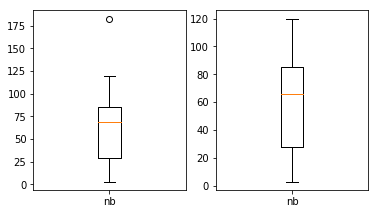

In [31]:
plt.figure(figsize=(6, 3.3))
plt.subplot(1, 2, 1)
plt.boxplot(df['nb'], labels=['nb'])
plt.subplot(1, 2, 2)
plt.boxplot(filtered['nb'], labels=['nb']);

## 思考：为什么不用正态分布来判断离群点？